In [1]:
# A bit of setup to help out
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from sklearn.preprocessing import StandardScaler

%matplotlib inline

<!-- dom:TITLE: Homework 1, PHY 959 -->
<!-- dom:AUTHOR: [PHY 959: Machine Learning in Physics]-->


# PHY 959: Homework Set #3
Due: **February 16, 2023**

___
***


# Problem 3: Crafting a k-Means Clustering Algorithm

In this problem, we will build a clustering algorithm that can be configured to perform k-Means or k-Medians clustering.  The goal is to explore the relatively simple algorithmic steps that represent the Expectation-Maximization process.  We will use the same Gaussian distributed data patterns seen in the class discussion session and in homework problems 1 and 2, as this simplifies the development of your algorithm (ie, for Gaussian data k-Means should almost always work!).  You will focus on getting the algorithm to work, but you can also consider adding performance metrics as in homework problems 1 and 2.  This last part is purely optional!



First, Generate Data
---

This is still the same `make_blobs` function we've used all along!

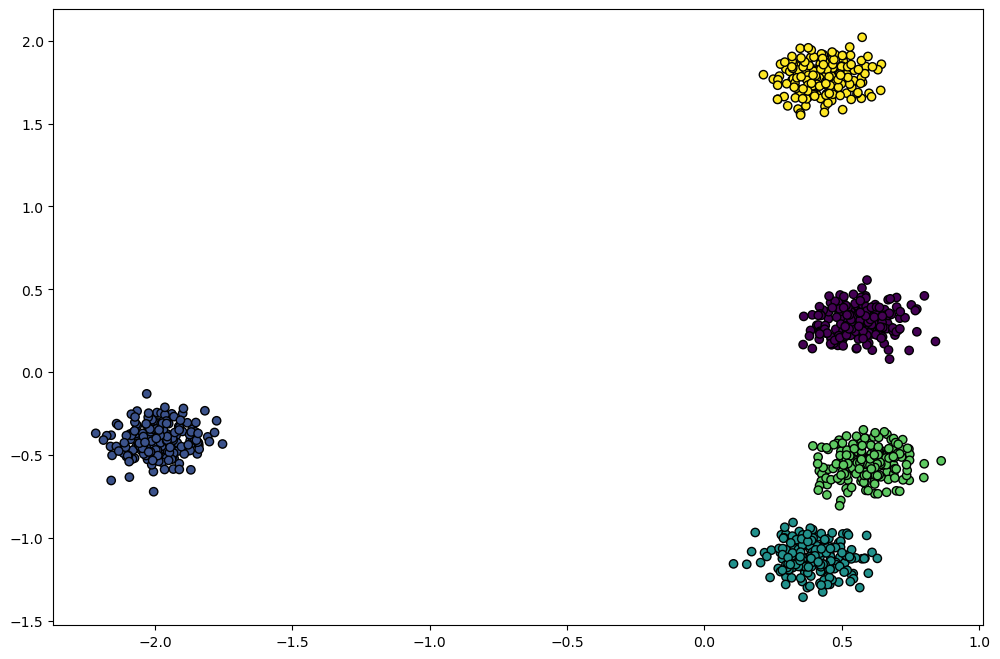

In [28]:
#Set cluster standard deviation
std=0.5

nClustersTrue = 5

# Generate sample data
X, labels_true = make_blobs(n_samples=1000, centers=nClustersTrue, cluster_std=std,random_state=4019)
X = StandardScaler().fit_transform(X)

fig = plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],edgecolor='0',c=labels_true)
plt.show()

Define methods for your clustering algorithm!
---

It is far better to organize your code using functions that clearly explain how the flow of your algorithm works.  For example, imagine that your code is a series of steps and your functions illustrate these steps:

`Initial_Step()`

`Second_Algorithm_Step()`

`Third_Algorithm_Step()`

This applies directly to k-Means or k-Medians clustering, as the steps are as follows:

1.  Calculate labels for your data given the previous set of cluster center predictions;
1.  Using these labels, update the cluster center predictions;
1.  Using the new cluster centers, update your object labels;
1.  Finally, using the updated labels and cluster centers, calculate your cost.

Your clustering algorithm will need to input some data:

1. The number of clusters you want the algorithm to produce;
1. The initial positions of the cluster centers;
1. The data values for the `[x,y]` positions of your objects;
1. For this homework set, you also need pass a variable to toggle between k-Means and k-Medians clustering.

I've set up some examples below and you can edit as you see fit.

In [17]:
# Define methods for your clustering algorithm!
def distance(cluster, center):
    return np.sqrt((cluster[0] - center[0]) ** 2 + (cluster[1] - center[1]) ** 2)

def clusterLabel(centers, cluster):
    distances = [distance(cluster, center) for center in centers]
    return np.argmin(distances)

def findLabels(centers, data):
    labels = np.zeros(data.shape[0], dtype='int')
    for i, cluster in enumerate(data):
        labels[i] = clusterLabel(centers, cluster)
    return labels

def findCost(metric, centers, labels, data):
    cost = 0
    for i, cluster in enumerate(data):
        center = centers[labels[i]]
        cost += distance(cluster, center) ** 2
    return cost

def findMeans(n_clusters, labels, data):
    means = np.zeros((n_clusters, 2))
    for k in range(n_clusters):
        points = data[labels == k]
        if len(points) > 0:
            means[k] = np.mean(points, axis=0)
    return means

def findMedians(n_clusters, labels, data):
    medians = np.zeros((n_clusters, 2))
    for k in range(n_clusters):
        points = data[labels == k]
        if len(points) > 0:
            medians[k] = np.median(points, axis=0)
    return medians
    
def cluster(n_clusters, input_centers, metric, data):
    labels = findLabels(input_centers, data)
    centers = findMeans(n_clusters, labels, data)
    labels = findLabels(centers, data)
    cost_out = findCost(metric, centers, labels, data)
    return labels, centers, cost_out

In [18]:
# This is the same cluster plotting method from the other HW and class discussion

#Plot the clustering results
def plot_clusters(labels, clusters, X,i):
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=5, alpha=0.5)
        print("Plotting: ",k, clusters[k])
        plt.plot(clusters[k,0],clusters[k,1],'o',markerfacecolor=col,
             markeredgecolor='k', markersize=20,alpha=0.8)
    plt.title('Clustering: Iteration %d'%(i)) 

## Run your clustering algorithm!

Now put it all together and run your clustering algorithm.  Remember to set this up so that you can toggle between k-Means and k-Medians.  Once your code is working, try out k-Means and k-Medians on a range of true cluster multiplicities and standard deviations.  Comment on the following:

1. Does your algorithm always converge?  Should it?  What would it mean if it did not converge?
1. Do you find that k-Means or k-Medians give substantially better results?  What do you expect from each?
1. Is the random intialization of cluster seeds a good idea?  How might you do this "better"?
1. What happens if a cluster center by chance is not the closest to any of your data points?  What could you do to fix that semi-random scenario?

## Running code with k-Median first

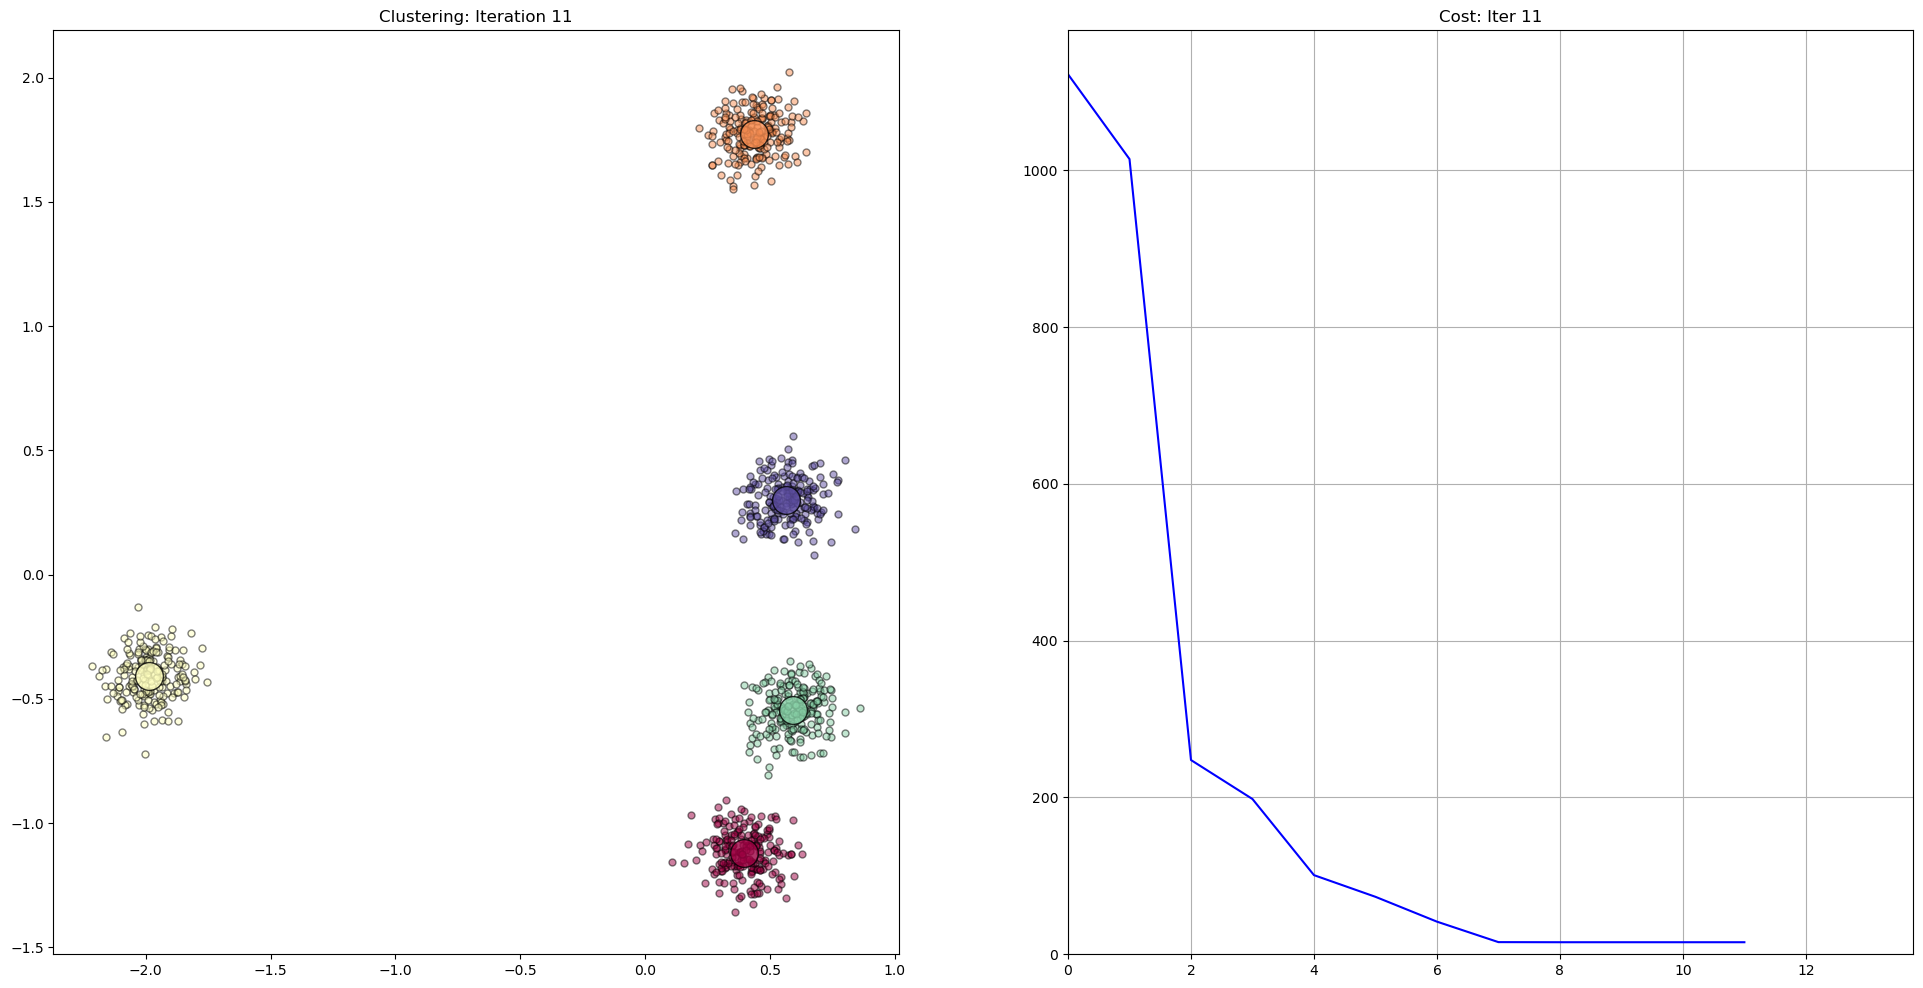

Plotting:  0 [ 0.39661427 -1.12050922]
Plotting:  1 [0.43476492 1.77503748]
Plotting:  2 [-1.9867622 -0.4083085]
Plotting:  3 [ 0.59114615 -0.54645512]
Plotting:  4 [0.56423686 0.30023537]


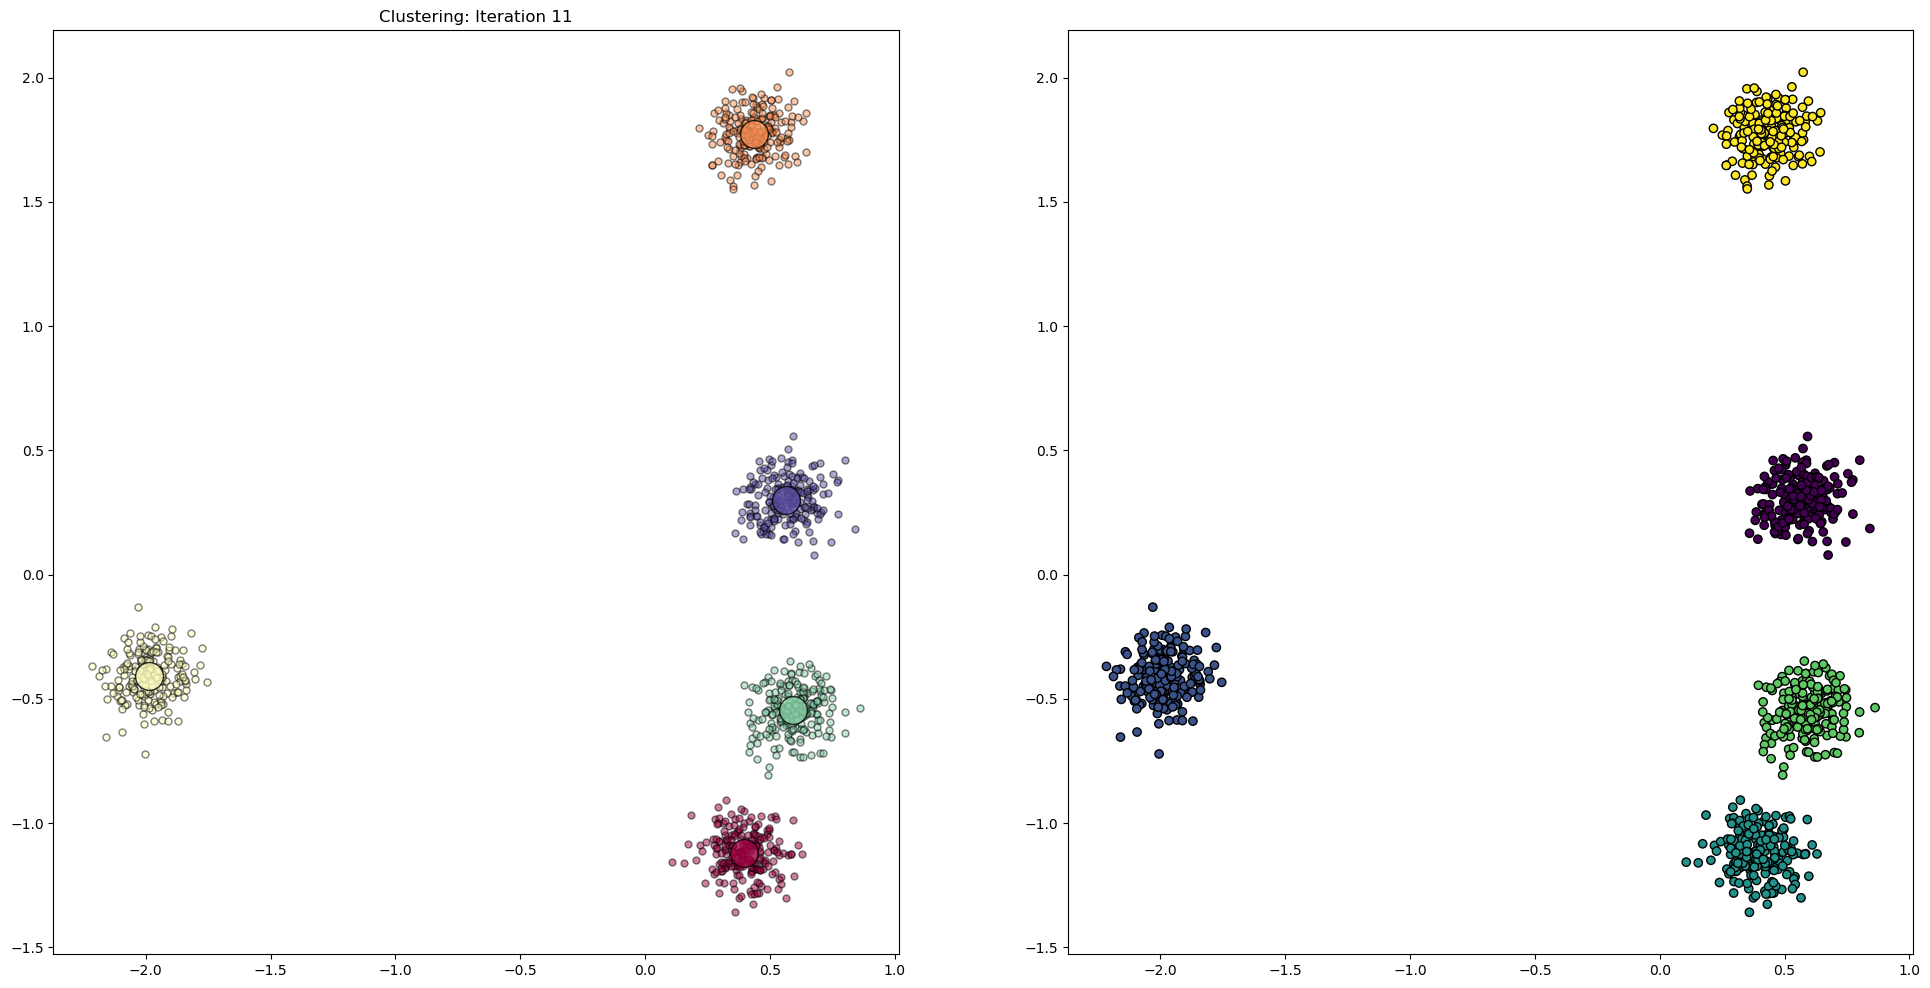

In [31]:
# Run your clustering algorithm!
n_clusters = nClustersTrue  # Set Number of Clusters
L = 100  # Number of learning steps
cost = np.zeros(L)  # Clustering cost per iterative step
std=0.5

# Randomly Initialize the Clusters
centers = 2.5 * (np.random.rand(n_clusters, 2) - 0.5)

from IPython.display import display

# Toggle between 'mean' (k-Means) and 'median' (k-Medians)
metric_type = 'median'  # Change this to 'median' for k-Medians

for i in range(L):
    labels, centers, cost[i] = cluster(n_clusters=n_clusters, input_centers=centers, metric=0, data=X)

    plt.figure(101, figsize=(24, 12))
    plt.subplot(1, 2, 1)
    plot_clusters(labels, centers, X, i)
    plt.subplot(1, 2, 2)
    plt.plot(cost[:i + 1], 'b-')
    plt.xlim(0, i * 1.25)
    plt.ylim(0, 1.05 * max(cost[:i + 1]))
    plt.title("Cost: Iter %d" % (i))
    plt.grid(True)

    display(plt.gcf(), clear=True)  # Use display with clear=True
    plt.close()  # Close the figure to free up memory

    if i > 10:
        if np.abs(cost[i - 1] - cost[i]) < 1e-6:
            break

# Plot the final clusters next to the truth labels to see how we did
plt.figure(101, figsize=(24, 12))
plt.subplot(1, 2, 1)
plot_clusters(labels, centers, X, i)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_true, edgecolor='0')
plt.show()

## Running code with k-Mean now

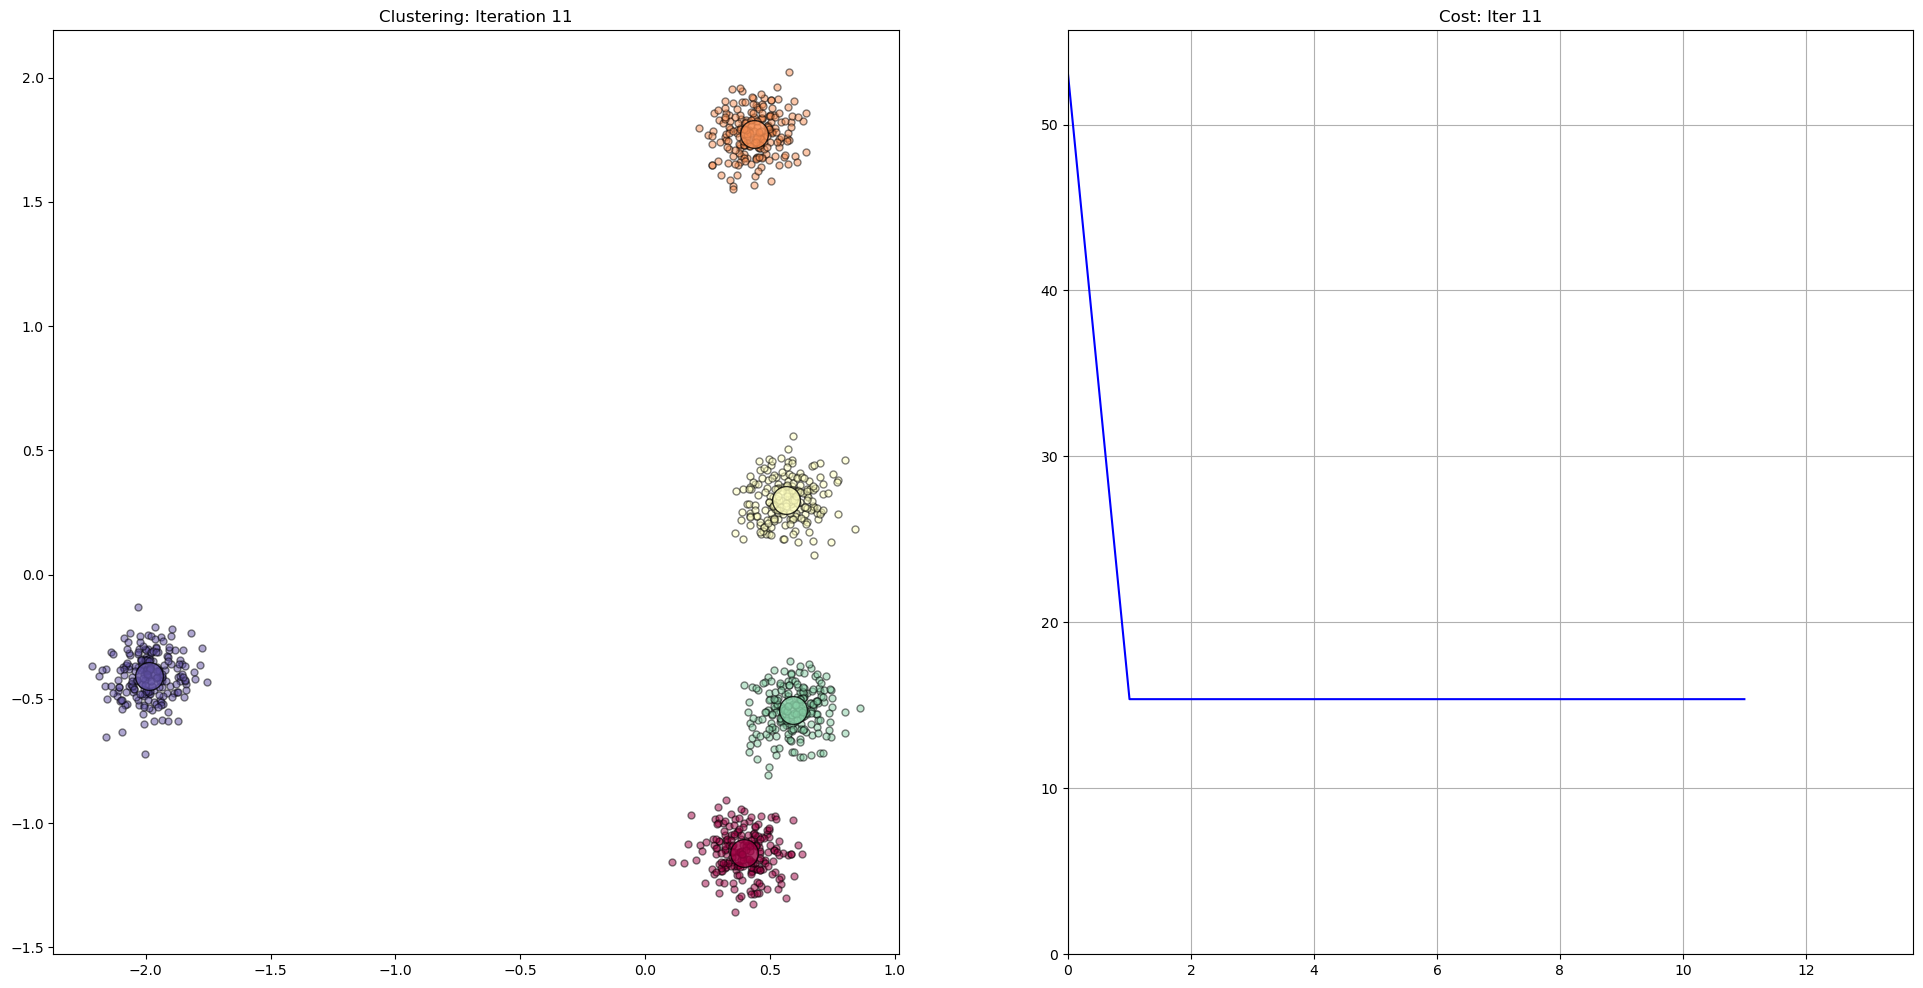

Plotting:  0 [ 0.39661427 -1.12050922]
Plotting:  1 [0.43476492 1.77503748]
Plotting:  2 [0.56423686 0.30023537]
Plotting:  3 [ 0.59114615 -0.54645512]
Plotting:  4 [-1.9867622 -0.4083085]


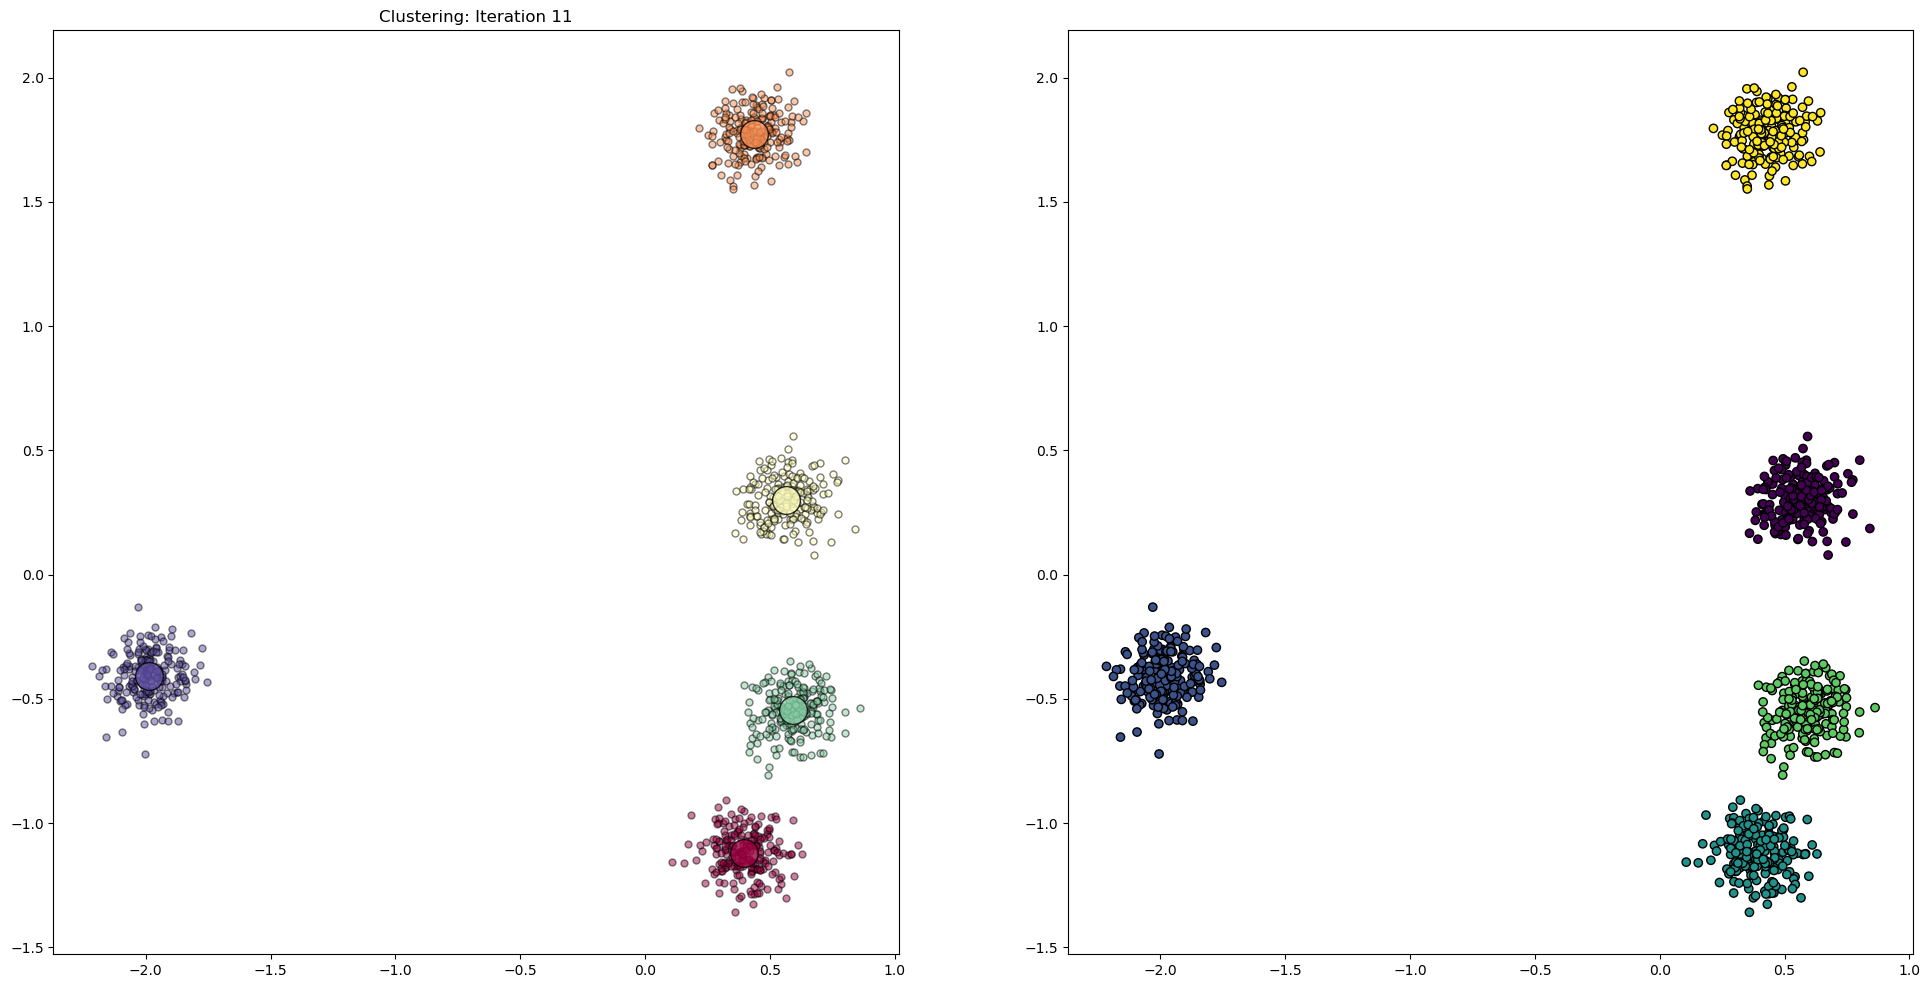

In [36]:
# Run your clustering algorithm!
n_clusters = nClustersTrue  # Set Number of Clusters
L = 100  # Number of learning steps
cost = np.zeros(L)  # Clustering cost per iterative step
std=0.5

# Randomly Initialize the Clusters
centers = 2.5 * (np.random.rand(n_clusters, 2) - 0.5)

from IPython.display import display

# Toggle between 'mean' (k-Means) and 'median' (k-Medians)
metric_type = 'mean'  # Change this to 'median' for k-Medians

for i in range(L):
    labels, centers, cost[i] = cluster(n_clusters=n_clusters, input_centers=centers, metric=metric_type, data=X)

    plt.figure(101, figsize=(24, 12))
    plt.subplot(1, 2, 1)
    plot_clusters(labels, centers, X, i)
    plt.subplot(1, 2, 2)
    plt.plot(cost[:i + 1], 'b-')
    plt.xlim(0, i * 1.25)
    plt.ylim(0, 1.05 * max(cost[:i + 1]))
    plt.title("Cost: Iter %d" % (i))
    plt.grid(True)

    display(plt.gcf(), clear=True)  # Use display with clear=True
    plt.close()  # Close the figure to free up memory

    if i > 10:
        if np.abs(cost[i - 1] - cost[i]) < 1e-6:
            break

# Plot the final clusters next to the truth labels to see how we did
plt.figure(101, figsize=(24, 12))
plt.subplot(1, 2, 1)
plot_clusters(labels, centers, X, i)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_true, edgecolor='0')
plt.show()


### 1. Does your algorithm always converge? Should it? What would it mean if it did not converge?
- **Does it always converge?** Not always. Convergence may fail with poor initializations or complex data.
- **Should it converge?** Ideally, yes. Convergence indicates stable cluster assignments.
- **What would it mean if it did not converge?** It may indicate poor initialization, inappropriate number of clusters, or complex data structure.

### 2. Do you find that k-Means or k-Medians give substantially better results? What do you expect from each?
- **k-Means:** Better for well-behaved, symmetric clusters with few outliers.
- **k-Medians:** Better for data with outliers or skewed distributions due to robustness against outliers.
- **Expectation:** k-Means performs well in most cases, but k-Medians is better when outliers or skewed clusters are present.

### 3. Is the random initialization of cluster seeds a good idea? How might you do this "better"?
- **Random Initialization:** Can lead to suboptimal results due to local minima.
- **Better Initialization:** Use **k-Means++** for better spread and faster convergence.

### 4. What happens if a cluster center by chance is not the closest to any of your data points? What could you do to fix that semi-random scenario?
- **What happens?** Incorrect initial center leads to incorrect cluster assignments, affecting convergence.
- **Fix:** Use **k-Means++** initialization or reassign the center to a data point closer to the cluster's data.
